In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

c:\Users\Monesh\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
data = pd.read_csv('linear_regression_dataset.csv')
data

,Category_1,Category_2,Ordinal_1,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target
0,B,X,Medium,0.7280,4.68000,2.2070,-1.5030,1.2380,-2.0940,2.3100,-4.9570,-0.06360,-2.02700,-1.189,3.9940,77.20
1,A,Y,Medium,1.1870,0.08356,2.7710,0.7560,-1.1410,0.9062,0.8450,1.0030,1.66700,-0.08386,-1.844,0.9526,58.78
2,B,Y,Low,-4.7930,1.85400,1.0270,-0.7573,1.8550,0.9785,1.6640,3.8950,-0.34800,-0.18810,-2.540,3.5760,50.00
3,B,Y,Medium,-1.5120,-0.21910,1.6340,-0.3198,0.5930,-0.4540,-0.1495,0.6763,-0.39580,0.70750,3.703,-3.3220,80.44
4,NaN,X,High,-0.7760,2.61300,0.6510,-4.3480,0.0322,0.5073,0.9014,0.2050,2.00000,-2.84600,-0.698,1.6150,47.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,C,Y,High,0.6753,-3.94000,-0.9917,3.0920,-0.0808,-1.1380,1.3020,-3.5120,-0.04803,3.96700,2.621,1.0240,77.50
1996,A,X,Medium,-1.7640,1.00800,2.2300,-0.7600,0.5470,4.4380,0.1846,NaN,1.43500,1.98500,NaN,-0.8223,38.47
1997,A,NaN,High,-0.7910,1.11200,-2.9400,-0.4710,1.6270,1.3170,0.9443,2.2460,0.90040,-0.68750,-1.726,-0.9653,10.70
1998,NaN,Y,High,2.8030,0.39620,0.4810,-0.2042,1.8090,-0.8870,0.9780,2.8320,-1.44500,2.84400,-3.113,2.8440,-9.52


### Missing Value Percent

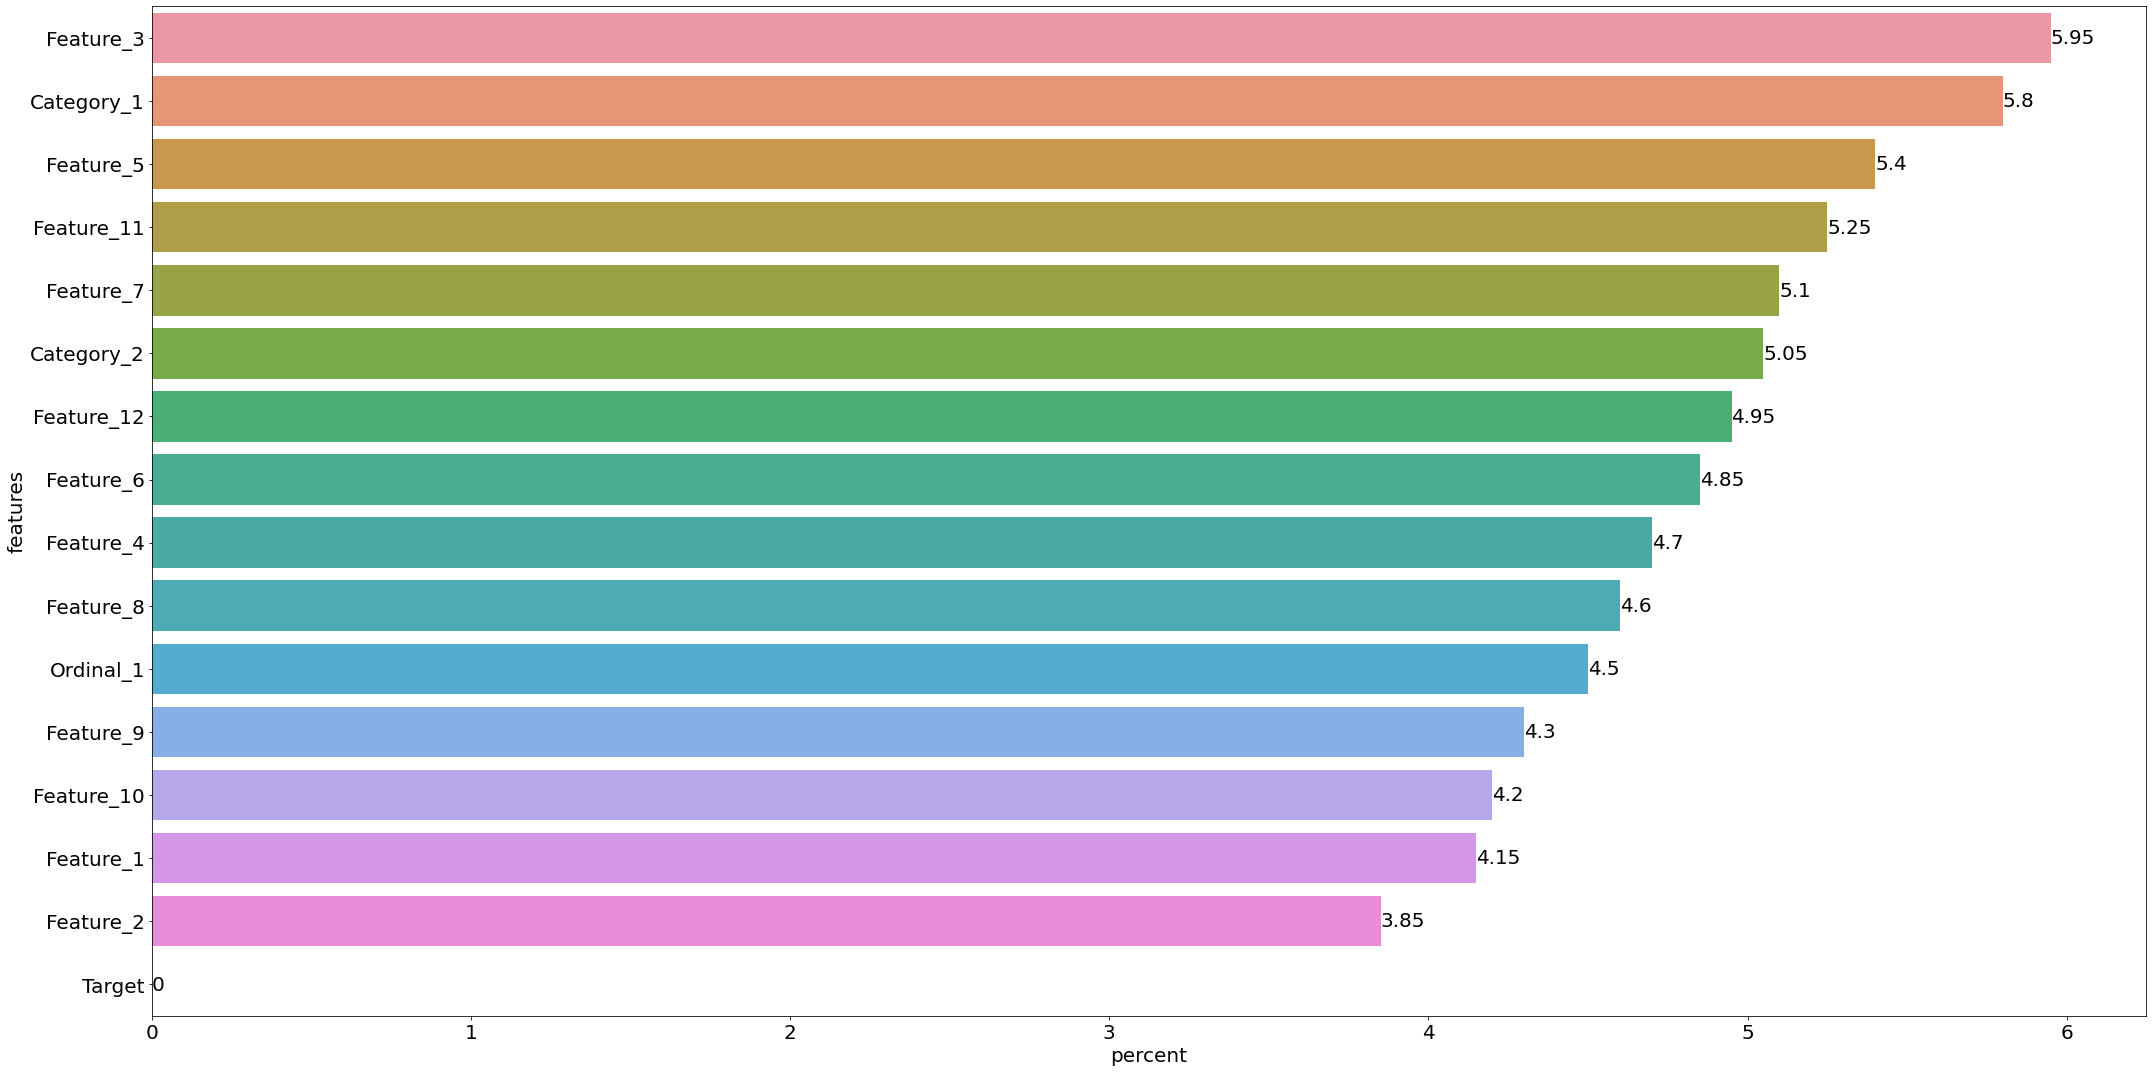

In [4]:
emp = {}
total_rows = data.shape[0]
for i in data.columns:
    null = data.loc[data[i].isnull()==True].shape[0]
    emp[i] = null

emp_ = pd.DataFrame(emp.items(), columns=['features', 'zeros'])
emp_['percent'] = round((emp_['zeros']/total_rows)*100,2)
emp_ = emp_.sort_values('percent',ascending=False)

fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x="percent", y="features",data=emp_)

# grouped bars will have multiple containers
for container in ax.containers:
    ax.bar_label(container,size=20)

plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=20)
plt.xlabel("percent",fontsize=20)
plt.ylabel("features",fontsize=20)
plt.tight_layout()

### Categorical Features

In [5]:
categorical = data.select_dtypes('O')
categorical

,Category_1,Category_2,Ordinal_1
0,B,X,Medium
1,A,Y,Medium
2,B,Y,Low
3,B,Y,Medium
4,NaN,X,High
...,...,...,...
1995,C,Y,High
1996,A,X,Medium
1997,A,NaN,High
1998,NaN,Y,High


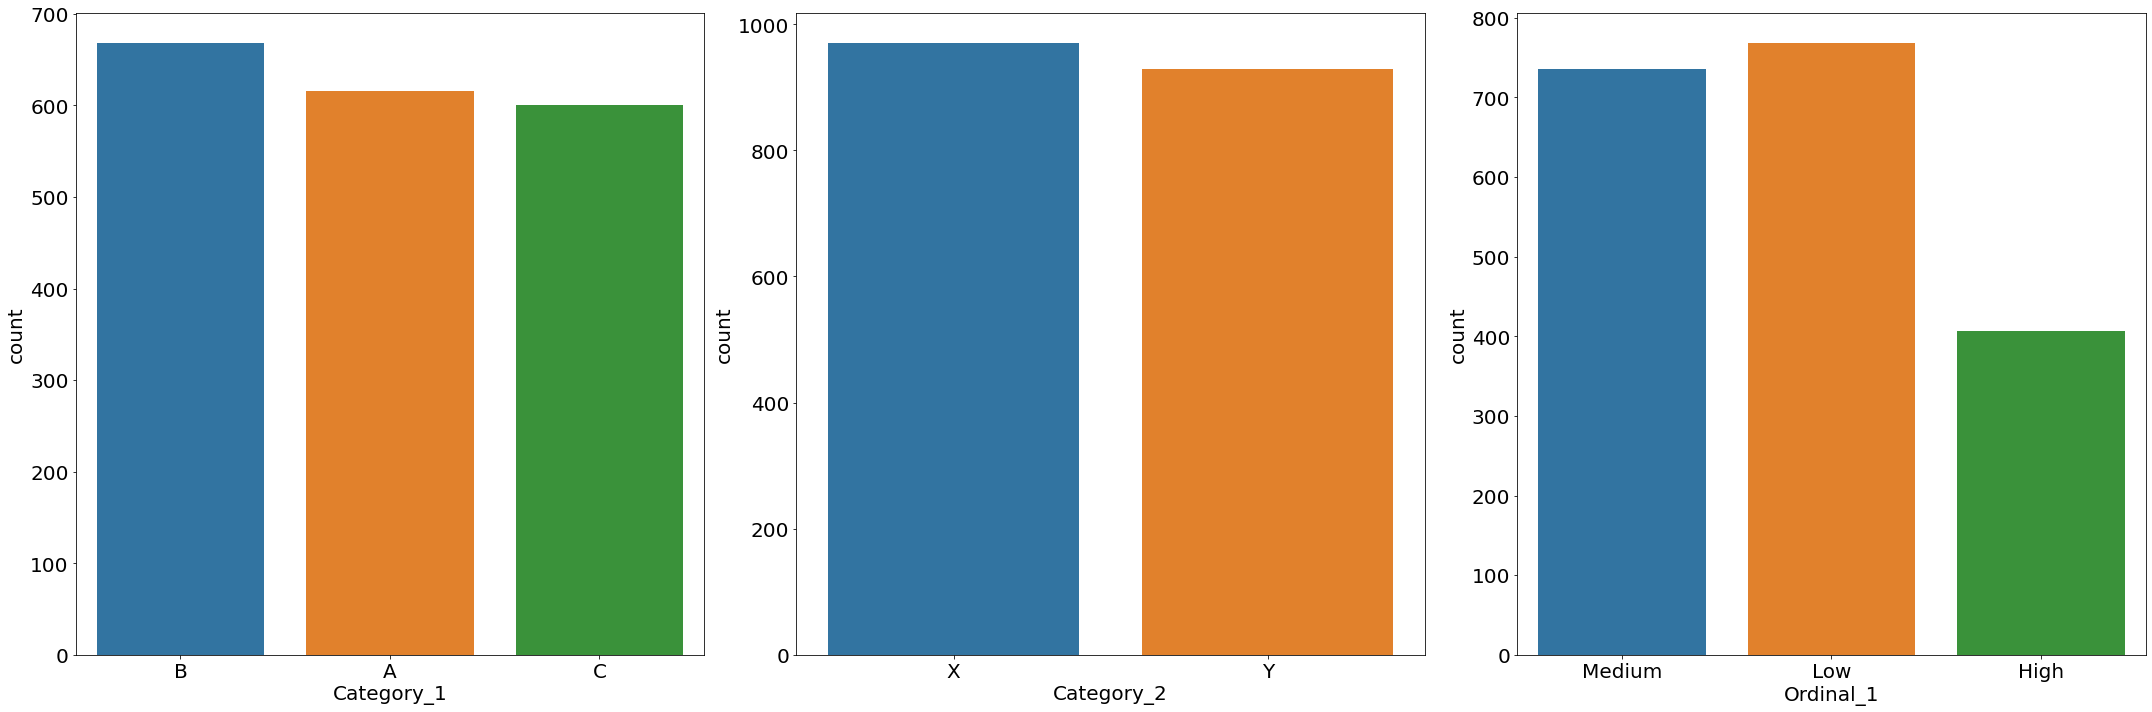

In [6]:
fig = plt.figure(figsize=(30,10))
count=0
for i in categorical.columns:
    plt.subplot(1,3,count+1)
    sns.countplot(categorical[i])
    plt.xticks(fontsize=20,rotation=0)
    plt.yticks(fontsize=20)
    plt.xlabel(i,fontsize=20)
    plt.ylabel("count",fontsize=20)
    count=count+1
    plt.tight_layout()

In [5]:
categorical.describe()

,Category_1,Category_2,Ordinal_1
count,1884,1899,1910
unique,3,2,3
top,B,X,Low
freq,668,970,768


In [7]:
# label encoding Ordinal_1 feature
# one hot encoding Nominal features : Category_1 and Category_2

categorical['Ordinal_1_label'] = np.where(categorical['Ordinal_1']=="Low",1,
                                          np.where(categorical['Ordinal_1']=="Medium",2,
                                          np.where(categorical['Ordinal_1']=="High",3,0)))

categorical = categorical.drop(columns=["Ordinal_1"])

one_hot_encode = pd.get_dummies(categorical,columns=['Category_1','Category_2'],drop_first=False)
one_hot_encode

,Ordinal_1_label,Category_1_A,Category_1_B,Category_1_C,Category_2_X,Category_2_Y
0,2,0,1,0,1,0
1,2,1,0,0,0,1
2,1,0,1,0,0,1
3,2,0,1,0,0,1
4,3,0,0,0,1,0
...,...,...,...,...,...,...
1995,3,0,0,1,0,1
1996,2,1,0,0,1,0
1997,3,1,0,0,0,0
1998,3,0,0,0,0,1


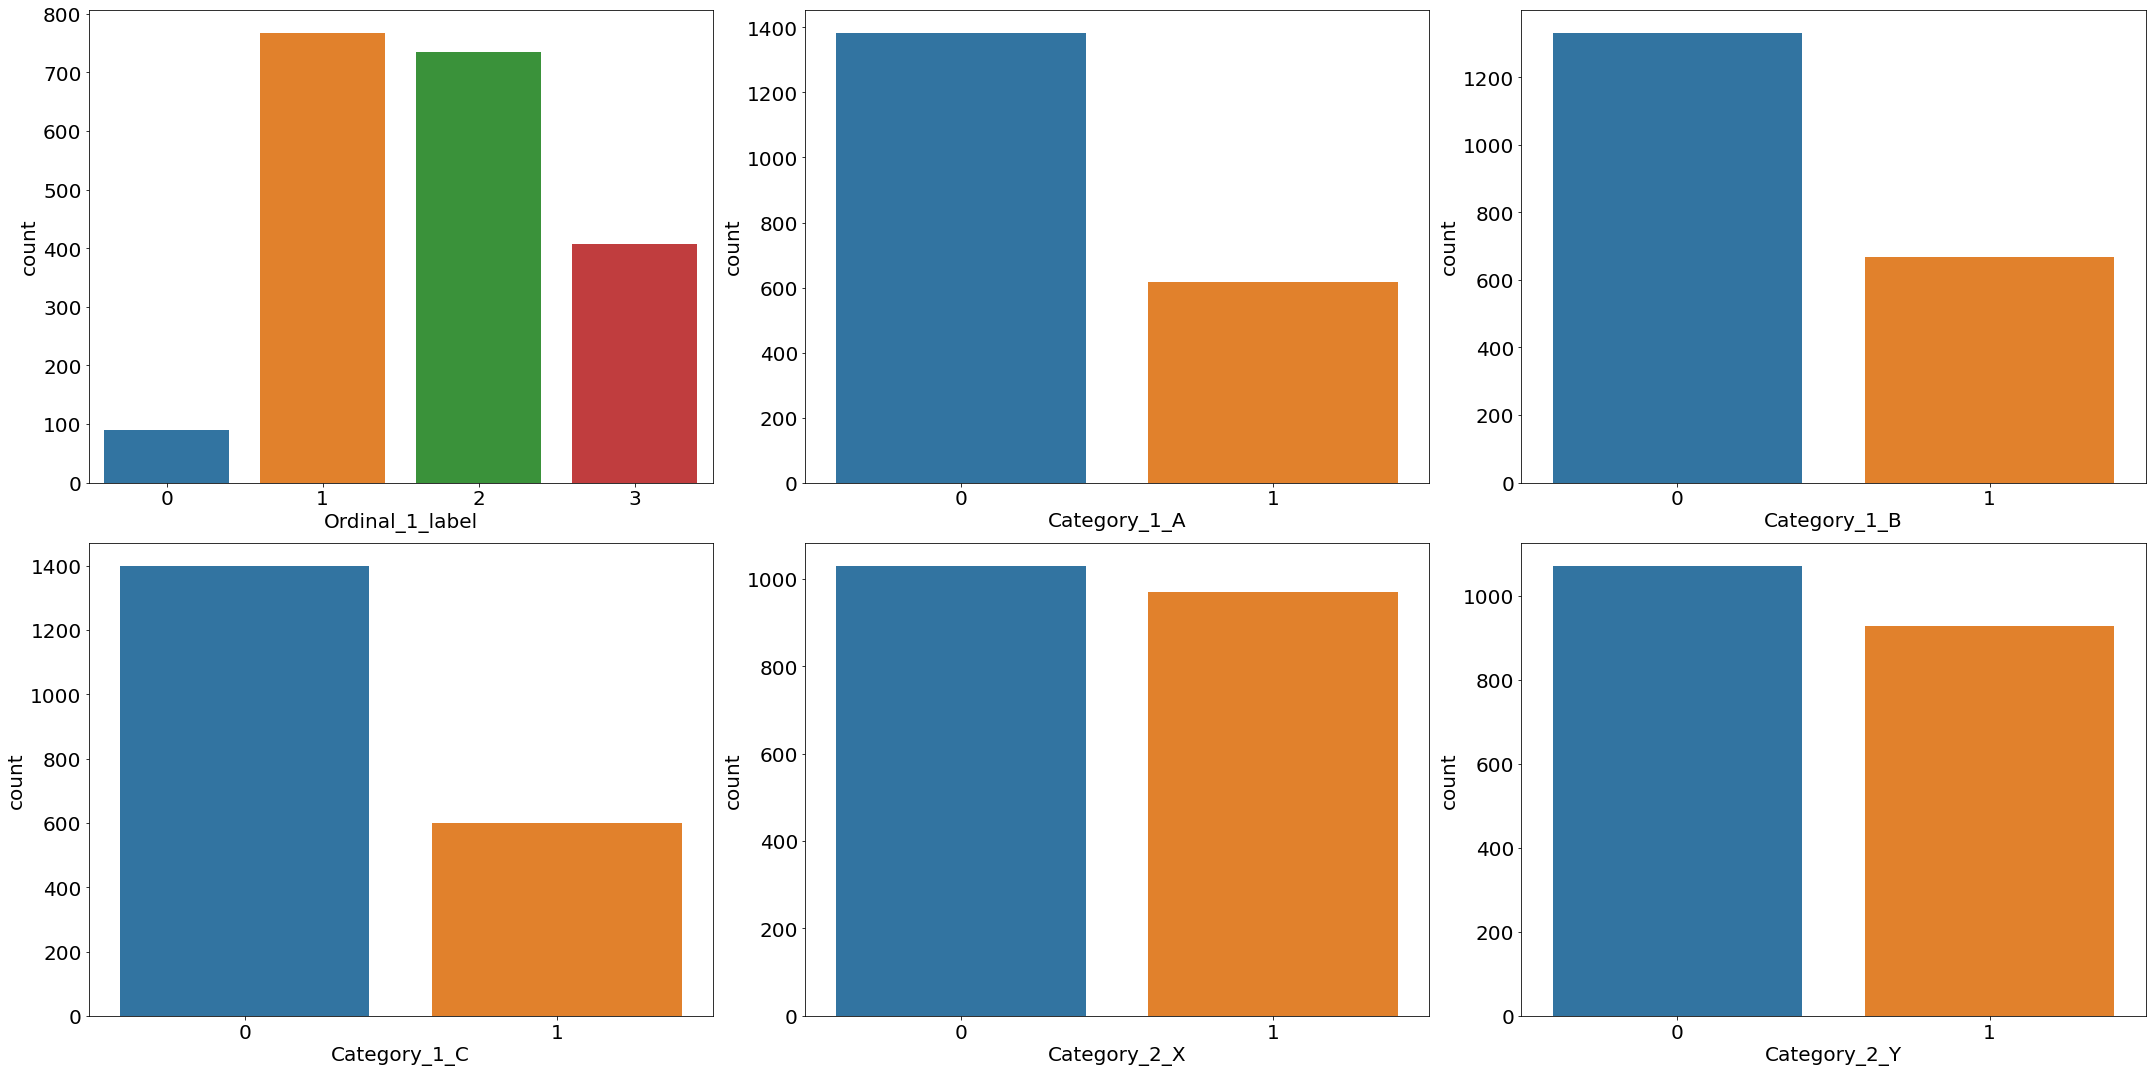

In [8]:
fig = plt.figure(figsize=(30,15))
count=0
for i in one_hot_encode.columns:
    plt.subplot(2,3,count+1)
    sns.countplot(one_hot_encode[i])
    plt.xticks(fontsize=20,rotation=0)
    plt.yticks(fontsize=20)
    plt.xlabel(i,fontsize=20)
    plt.ylabel("count",fontsize=20)
    count=count+1
    plt.tight_layout()
# sns.countplot(one_hot_encode['Ordinal_1_label'])

### Numerical Features

In [9]:
# imputing Nan values with zero
numerical = data.select_dtypes('number')
numerical_imputed = numerical.fillna(0)

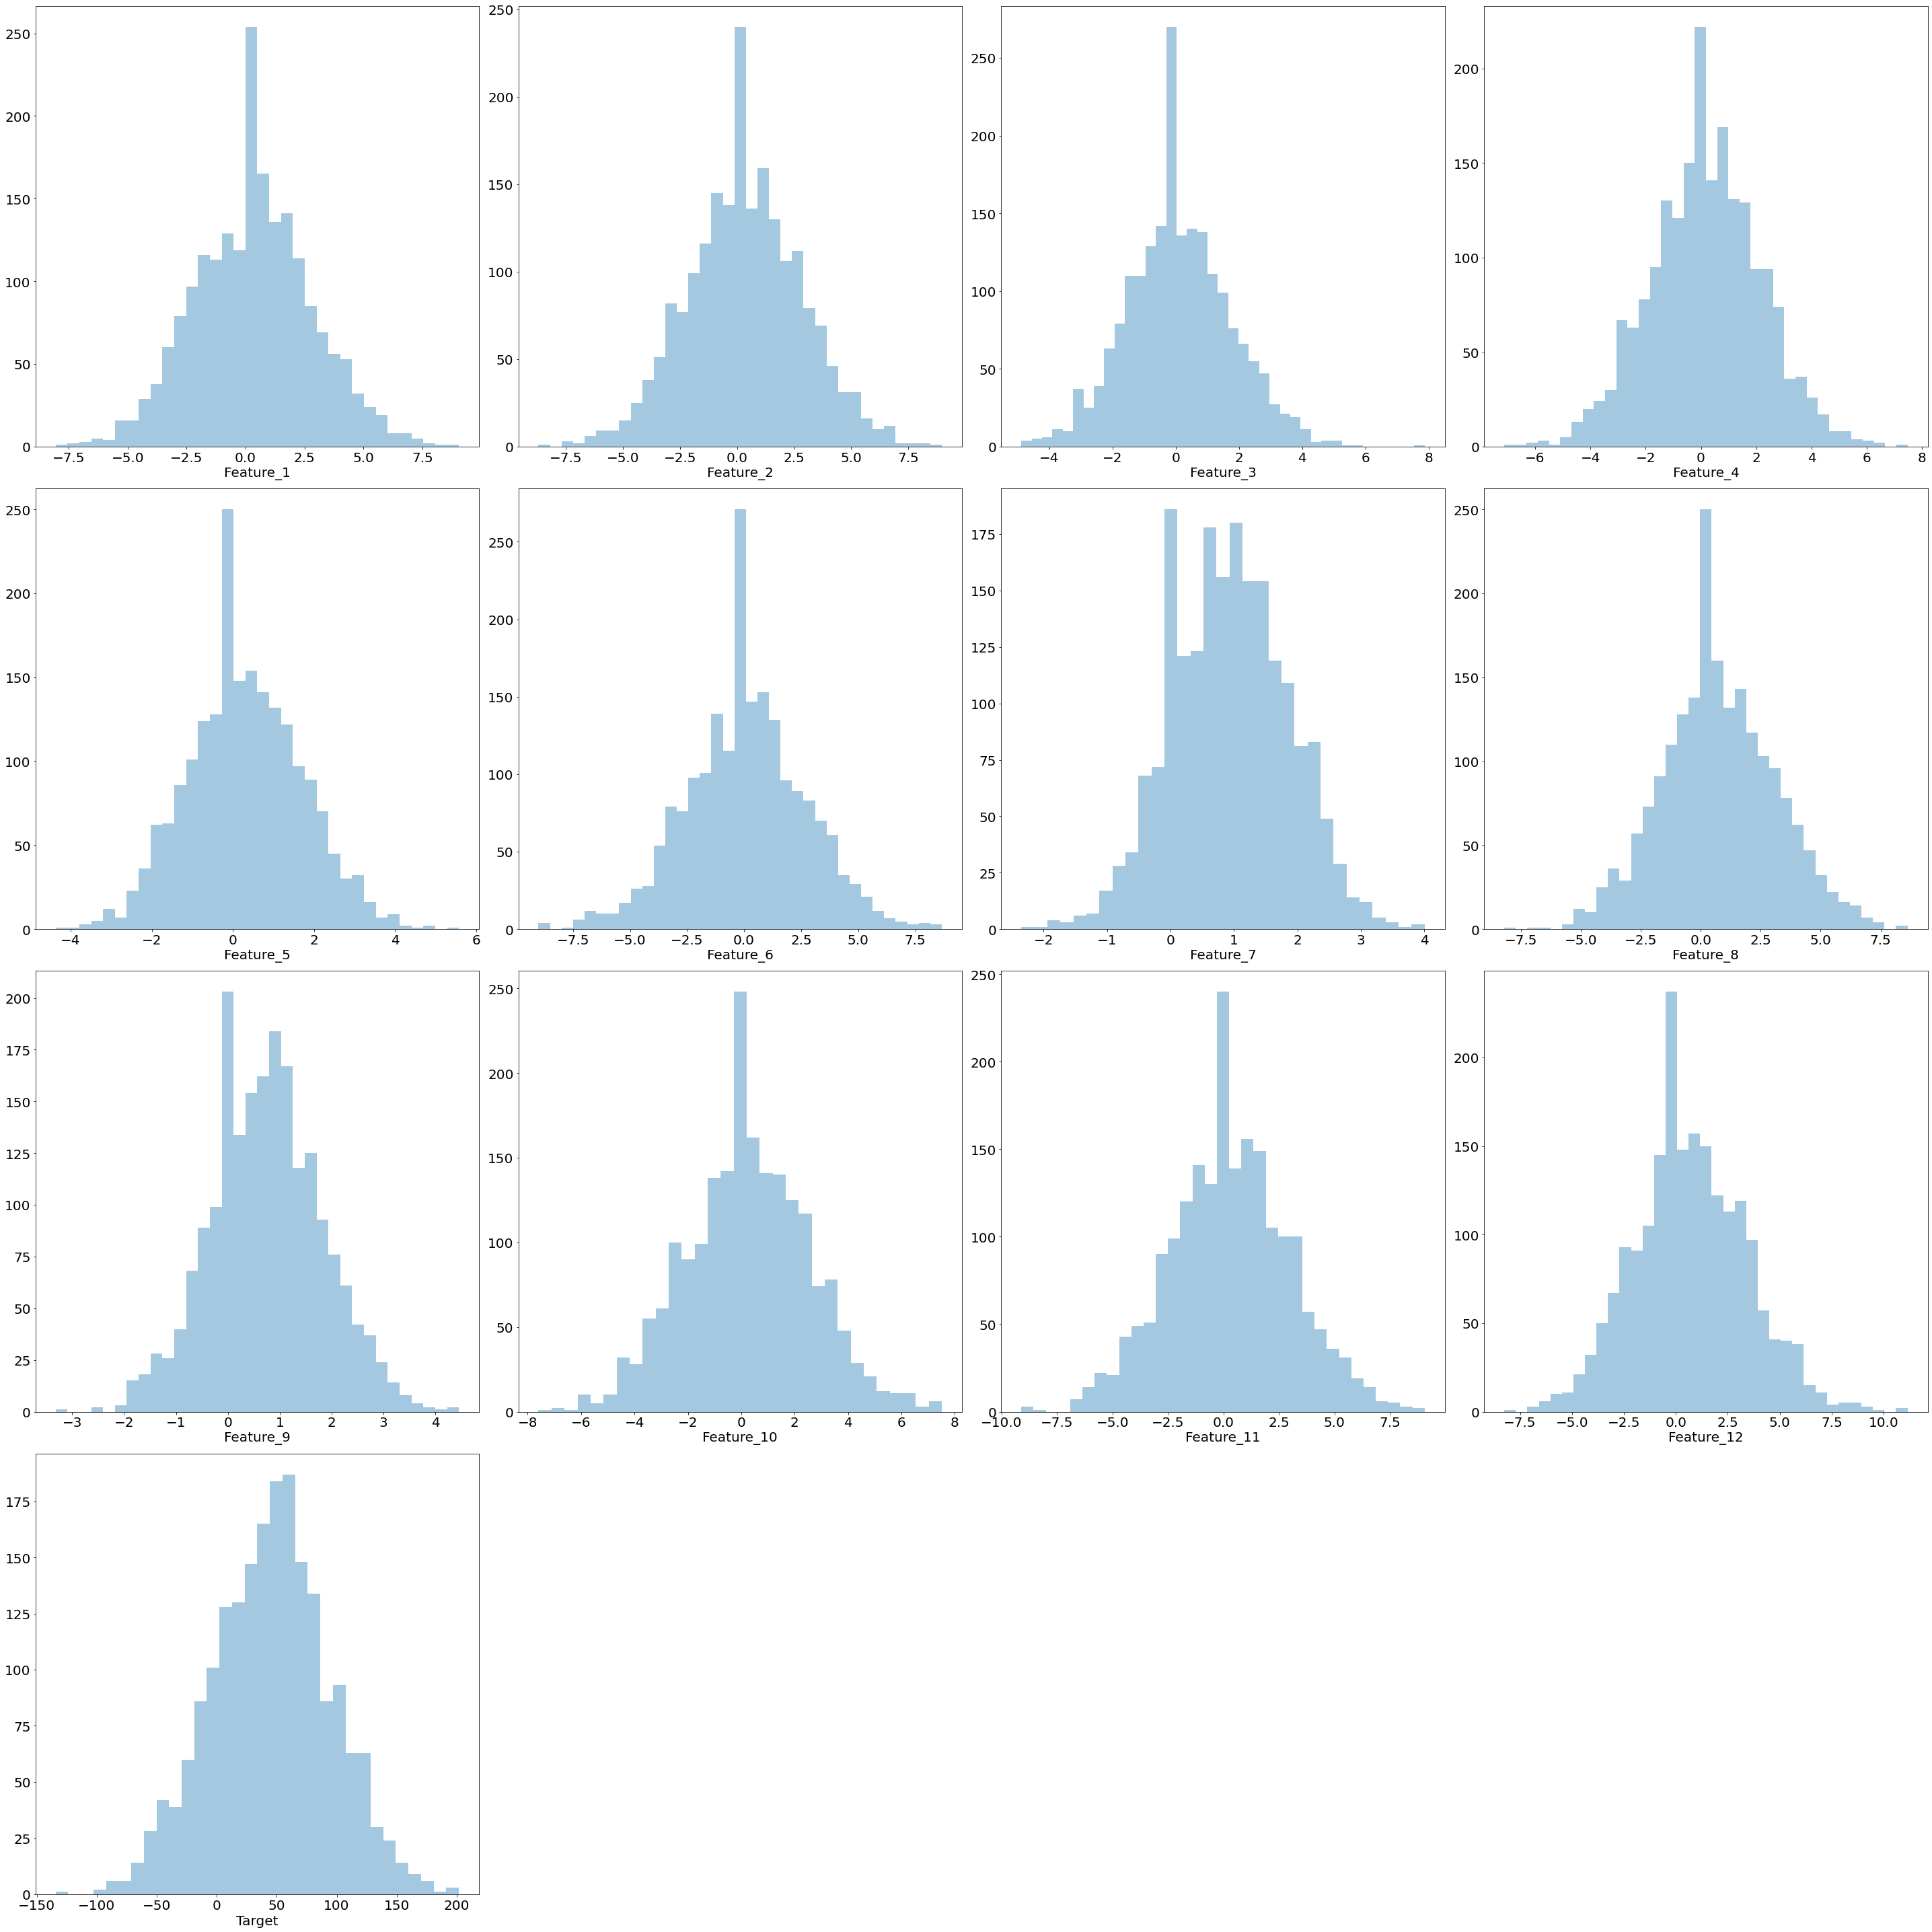

In [10]:
fig = plt.figure(figsize=(40,40))
count=0
for i in numerical_imputed.columns:
    plt.subplot(4,4,count+1)
    sns.distplot(numerical_imputed[i],kde=False,bins=None)
    plt.xticks(fontsize=20,rotation=0)
    plt.yticks(fontsize=20)
    plt.xlabel(i,fontsize=20)
    count=count+1
    plt.tight_layout()
    
## observation : Numerical Features are Normally Distributed

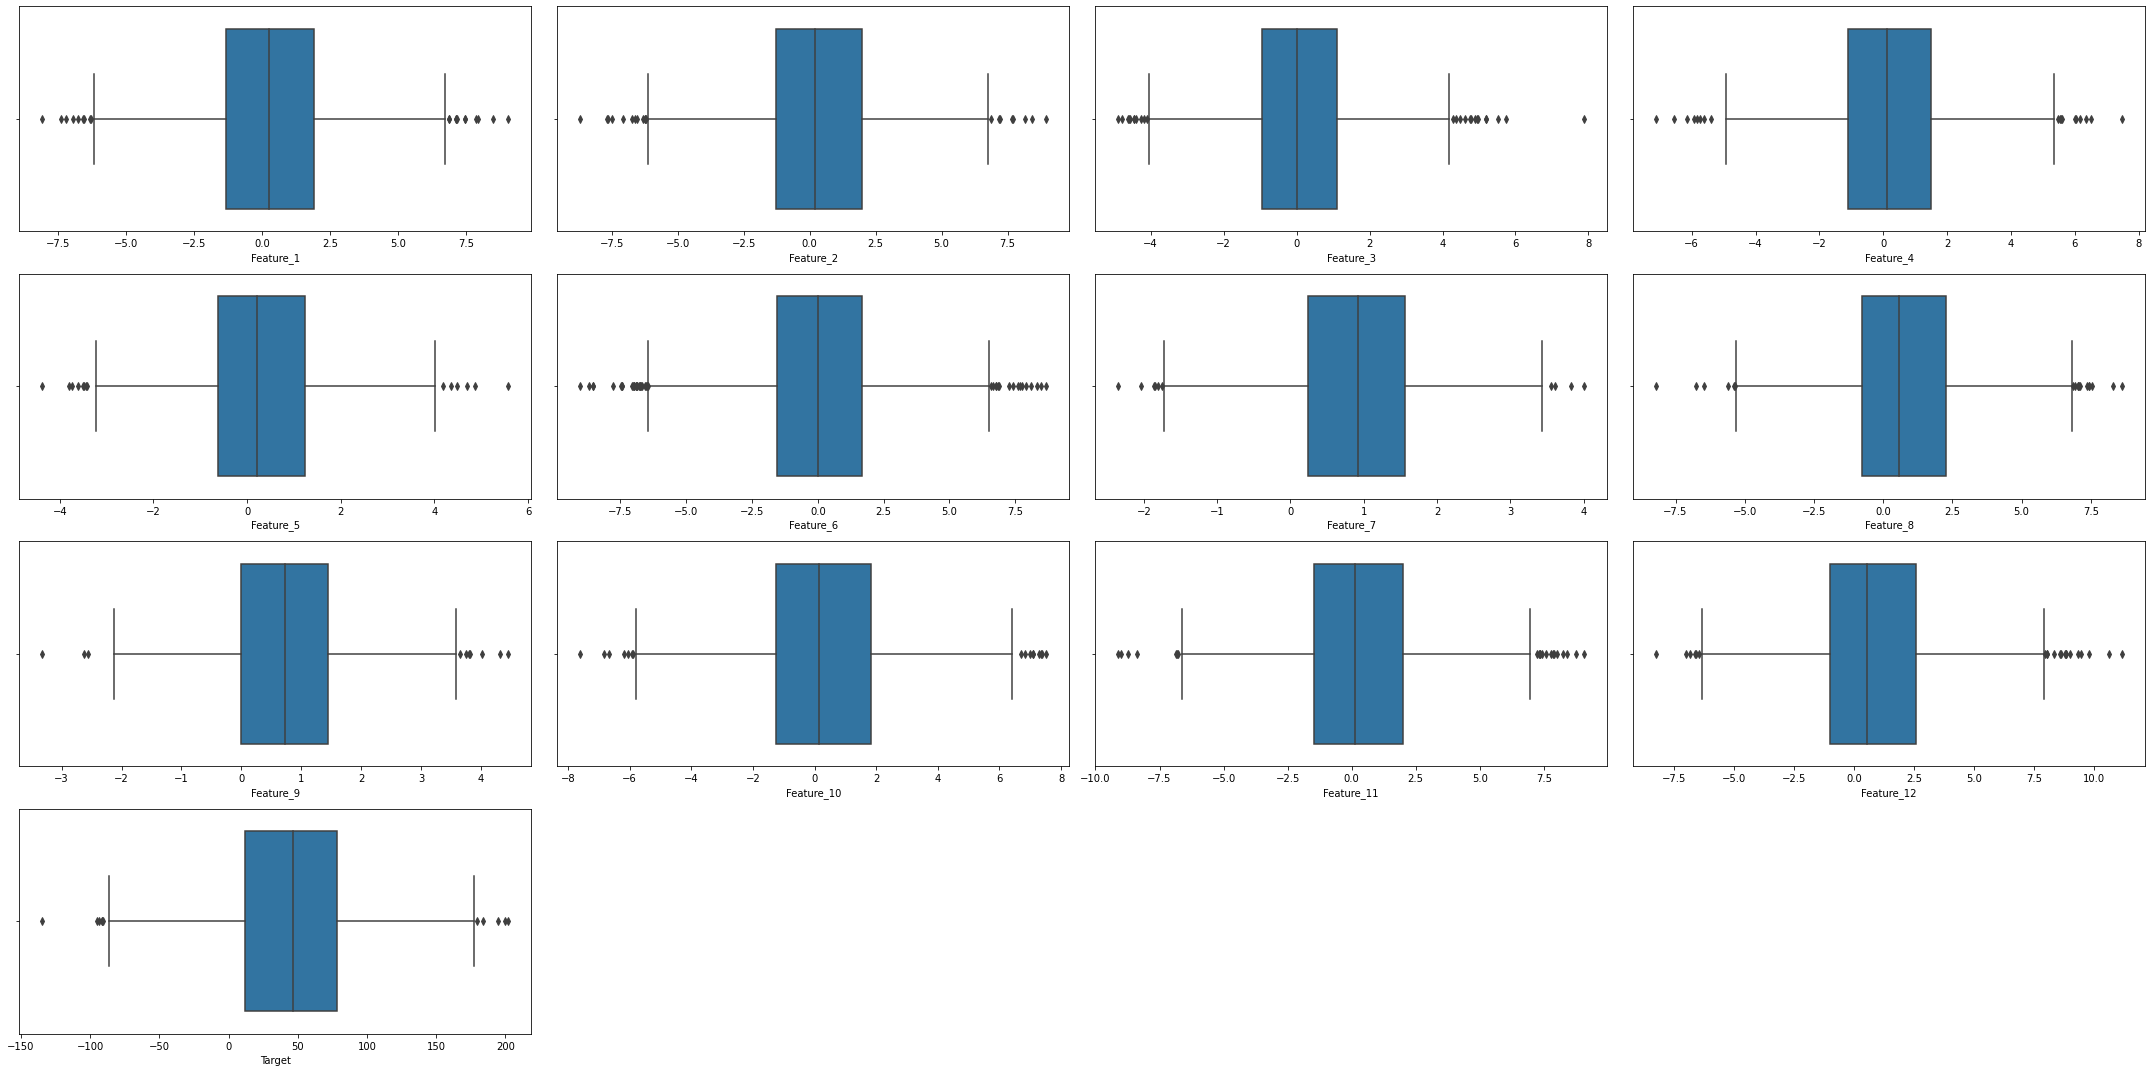

In [11]:
plt.figure(figsize=(30,15))
count=0
for i in numerical_imputed.columns:
    plt.subplot(4,4,count+1)
    sns.boxplot(numerical_imputed[i])
    count = count + 1
plt.tight_layout()

In [12]:
# correlation table
numerical_imputed.corr()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target
Feature_1,1.000000,0.004983,0.021284,-0.011846,0.048157,0.000633,0.001686,0.028718,0.007058,0.010401,-0.016479,-0.014902,-0.463937
Feature_2,0.004983,1.000000,0.026580,-0.018132,0.011732,0.027456,0.011707,-0.045826,-0.008753,-0.019740,-0.033721,-0.035328,-0.261726
Feature_3,0.021284,0.026580,1.000000,-0.030623,0.041291,-0.016967,-0.014465,-0.010197,-0.008782,0.028507,-0.004323,0.034305,0.303598
Feature_4,-0.011846,-0.018132,-0.030623,1.000000,-0.033484,0.010295,-0.014465,-0.024922,-0.006918,0.021926,0.027418,-0.000394,0.383775
Feature_5,0.048157,0.011732,0.041291,-0.033484,1.000000,0.040194,0.022568,-0.019610,0.015259,-0.001991,-0.000828,-0.027052,0.099266
Feature_6,0.000633,0.027456,-0.016967,0.010295,0.040194,1.000000,-0.034295,-0.036402,-0.005132,0.020476,-0.033334,0.017574,-0.236355
Feature_7,0.001686,0.011707,-0.014465,-0.014465,0.022568,-0.034295,1.000000,-0.003294,0.038205,0.022634,-0.003862,0.013666,0.097776
Feature_8,0.028718,-0.045826,-0.010197,-0.024922,-0.019610,-0.036402,-0.003294,1.000000,0.002767,0.020149,-0.006379,-0.029598,-0.279479
Feature_9,0.007058,-0.008753,-0.008782,-0.006918,0.015259,-0.005132,0.038205,0.002767,1.000000,0.009954,-0.016588,0.017966,0.050567
Feature_10,0.010401,-0.019740,0.028507,0.021926,-0.001991,0.020476,0.022634,0.020149,0.009954,1.000000,0.006714,-0.010910,-0.369078


### Final DataFrame

In [13]:
# dataframe tpo be used for modelling
final_data = pd.concat([one_hot_encode,numerical_imputed],axis=1)
final_data

,Ordinal_1_label,Category_1_A,Category_1_B,Category_1_C,Category_2_X,Category_2_Y,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target
0,2,0,1,0,1,0,0.7280,4.68000,2.2070,-1.5030,1.2380,-2.0940,2.3100,-4.9570,-0.06360,-2.02700,-1.189,3.9940,77.20
1,2,1,0,0,0,1,1.1870,0.08356,2.7710,0.7560,-1.1410,0.9062,0.8450,1.0030,1.66700,-0.08386,-1.844,0.9526,58.78
2,1,0,1,0,0,1,-4.7930,1.85400,1.0270,-0.7573,1.8550,0.9785,1.6640,3.8950,-0.34800,-0.18810,-2.540,3.5760,50.00
3,2,0,1,0,0,1,-1.5120,-0.21910,1.6340,-0.3198,0.5930,-0.4540,-0.1495,0.6763,-0.39580,0.70750,3.703,-3.3220,80.44
4,3,0,0,0,1,0,-0.7760,2.61300,0.6510,-4.3480,0.0322,0.5073,0.9014,0.2050,2.00000,-2.84600,-0.698,1.6150,47.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3,0,0,1,0,1,0.6753,-3.94000,-0.9917,3.0920,-0.0808,-1.1380,1.3020,-3.5120,-0.04803,3.96700,2.621,1.0240,77.50
1996,2,1,0,0,1,0,-1.7640,1.00800,2.2300,-0.7600,0.5470,4.4380,0.1846,0.0000,1.43500,1.98500,0.000,-0.8223,38.47
1997,3,1,0,0,0,0,-0.7910,1.11200,-2.9400,-0.4710,1.6270,1.3170,0.9443,2.2460,0.90040,-0.68750,-1.726,-0.9653,10.70
1998,3,0,0,0,0,1,2.8030,0.39620,0.4810,-0.2042,1.8090,-0.8870,0.9780,2.8320,-1.44500,2.84400,-3.113,2.8440,-9.52


In [17]:
## separating the independent and target variables
x = final_data.iloc[:,:-1].to_numpy()
y = final_data.iloc[:,-1].to_numpy().reshape(-1,1)

### Gradient Descent

In [15]:
## function to calculate gradient and cost function J (MSE) 
def getGradient(x,y,w,b):
    n = x.shape[0]
    y_pre = np.dot(x,w) + b
    error = y_pre - y
    dw = np.sum(np.multiply(error,x),axis=0)*(2/n)
    db = np.sum(error)*(2/n)
    mse = np.sum(error**2)*(1/n)
    return dw,db,mse

## function to update parameters w and b
def updateParameters(x_shuffled,y_shuffled,w,b,alpha,tol,steps=1000,batch_flag=0):
    
    cost_iter = []
    iteration = 1

    while iteration<=steps:
        dw,db,mse= getGradient(x_shuffled,y_shuffled,w,b)
        
        if batch_flag==0:
            cost_iter.append(mse)
            
        w_new = w - (alpha*dw.reshape(-1,1))
        b_new = b - (alpha*db.reshape(-1,1))

        if (np.sum(abs(w-w_new))<tol) & (abs(b.flatten()-b_new.flatten())<tol):
            print("Converged")
            break

        if (iteration%10)==0:
            pass
#             print('Parameters after iteration %d:'%iteration,w_new,b_new)
#             print('MSE:',mse)

        iteration = iteration+1
        w = w_new
        b = b_new
        
    if iteration < steps:
        print('Final Parameters after convergence in iteration %d:'%iteration,w,b)
    else:
        print('Max Iterations Reached Final Parameters in iteration %d:'%iteration,w,b)
        
    print('MSE:',mse)

    if batch_flag==1:
        cost_iter.append(mse)
        
    return w,b,cost_iter,mse
    

In [18]:
# shuffling the dataset 
order = np.random.permutation(len(x))
x_shuffled = x[order]
y_shuffled = y[order]

In [25]:
## gradient descent algorithm cell

p = x_shuffled.shape[1]

# random initialisation of w and b
# np.random.seed(1)
w_rand = np.random.randn(p,1)
b_rand = np.random.randn(1)
print("Starting Parameters:",w_rand,b_rand)

# learning rate
alpha = 0.0001

# tolerance
tol = 0.001

w_grad,b_grad,cost_iter,mse= updateParameters(x_shuffled,y_shuffled,w_rand,b_rand,alpha,tol,steps=30000)



Starting Parameters: [[ 0.93110208]
 [ 0.28558733]
 [ 0.88514116]
 [-0.75439794]
 [ 1.25286816]
 [ 0.51292982]
 [-0.29809284]
 [ 0.48851815]
 [-0.07557171]
 [ 1.13162939]
 [ 1.51981682]
 [ 2.18557541]
 [-1.39649634]
 [-1.44411381]
 [-0.50446586]
 [ 0.16003707]
 [ 0.87616892]
 [ 0.31563495]] [-2.02220122]
Converged
Final Parameters after convergence in iteration 19970: [[ 7.35490023]
 [-0.08243788]
 [ 3.75288168]
 [11.96606362]
 [13.33327821]
 [ 4.09805064]
 [-9.08852999]
 [-5.39437866]
 [10.27642022]
 [ 9.81607417]
 [ 4.32494138]
 [-4.20947916]
 [ 8.26347504]
 [-5.27050013]
 [ 4.32969418]
 [-8.13922174]
 [ 0.5578162 ]
 [-3.69648071]] [[16.05794556]]
MSE: 265.2009330013376


Final Parameters:
w: [ 7.35490023 -0.08243788  3.75288168 11.96606362 13.33327821  4.09805064
 -9.08852999 -5.39437866 10.27642022  9.81607417  4.32494138 -4.20947916
  8.26347504 -5.27050013  4.32969418 -8.13922174  0.5578162  -3.69648071]
b: [16.05794556]
MSE: 265.2009330013376


Text(0, 0.5, 'MSE')

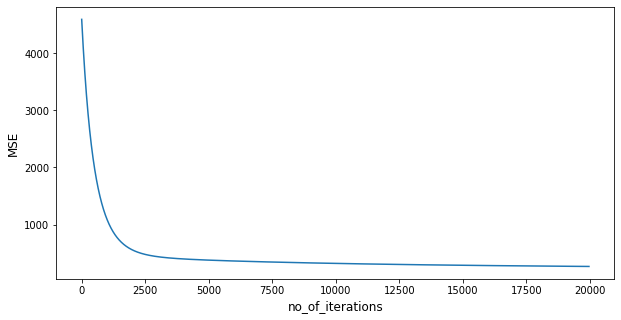

In [26]:
# plotting error vs iteration for gradient descent
print("Final Parameters:")
print("w:",w_grad.flatten())
print("b:",b_grad.flatten())
print("MSE:",mse)
plt.figure(figsize=(10,5))
sns.lineplot(x=np.arange(len(cost_iter)),y=cost_iter)
plt.xlabel("no_of_iterations",fontsize=12)
plt.ylabel("MSE",fontsize=12)

## Mini Batch Gradient Descent

In [28]:
# making min batches according to batch size
# for the stochastic gradient descent update the batch size with 1
batch_size=32
start=0
end=final_data.shape[0]
mini_batches = []
while start < end:
    batch = final_data.iloc[start:start+batch_size]
    start = start+batch_size
    mini_batches.append(batch)
    
print("No of Batches:",len(mini_batches))


No of Batches: 63


In [31]:
no_of_batches = len(mini_batches)
p = x.shape[1]

np.random.seed(4)
w_mini = np.random.randn(p,1)
b_mini = np.random.randn(1)

print("Starting Parameters:",w_mini,b_mini)

alpha = 0.00001
tol = 0.001
cost_iter_mini = []
cost_iter_epoch = []

steps = 2000
epochs = 10

for epoch in range(epochs):
    mse_epoch = 0
    for mini_batch in mini_batches:
        x = mini_batch.iloc[:,:-1].to_numpy()
        y = mini_batch.iloc[:,-1].to_numpy().reshape(-1,1)
        
#         np.random.seed(0)
        order_mini = np.random.permutation(len(x))
        x_mini = x[order_mini]
        y_mini = y[order_mini]
        
        w_mini,b_mini,cost_iter_batch,mse=updateParameters(x_mini,y_mini,w_mini,b_mini,alpha,tol,steps,1)
        cost_iter_mini.append(cost_iter_batch[0])
    
        mse_epoch = mse_epoch + mse
    cost_iter_epoch.append(mse_epoch)


Starting Parameters: [[ 0.05056171]
 [ 0.49995133]
 [-0.99590893]
 [ 0.69359851]
 [-0.41830152]
 [-1.58457724]
 [-0.64770677]
 [ 0.59857517]
 [ 0.33225003]
 [-1.14747663]
 [ 0.61866969]
 [-0.08798693]
 [ 0.4250724 ]
 [ 0.33225315]
 [-1.15681626]
 [ 0.35099715]
 [-0.60688728]
 [ 1.54697933]] [0.72334161]
Max Iterations Reached Final Parameters in iteration 2001: [[ 2.83787667]
 [ 0.72095968]
 [-0.50929931]
 [ 1.73390321]
 [ 0.44201873]
 [-0.67656921]
 [-3.87638986]
 [ 0.59644773]
 [ 2.706685  ]
 [ 0.13334941]
 [ 1.20397555]
 [ 0.08899325]
 [ 2.66543156]
 [ 0.38423647]
 [ 0.77628153]
 [-0.62172432]
 [ 0.53390685]
 [ 2.01599516]] [[2.55843487]]
MSE: 3388.7523340006774
Max Iterations Reached Final Parameters in iteration 2001: [[ 4.0376606 ]
 [ 1.01969452]
 [-0.51917217]
 [ 2.03662223]
 [ 0.91326372]
 [-0.49993783]
 [-4.33206435]
 [-0.52838121]
 [ 3.05265957]
 [ 0.80018974]
 [ 1.56667391]
 [-0.74843751]
 [ 3.5826035 ]
 [ 0.16563443]
 [ 1.20616823]
 [-1.40606644]
 [ 0.92850504]
 [ 1.6591610

Final Parameters:
w: [ 2.20038796 -1.44925591  2.36997409 15.55996452 13.75527224  3.40933104
 -9.08019135 -5.22532748  9.72781997  9.7209394   4.26875213 -4.07979338
  6.46981761 -5.3938275   3.12281783 -8.21697284  1.2802826  -3.73473809]
b: [29.27485531]
MSE: 93.7197031656419


Text(0, 0.5, 'MSE')

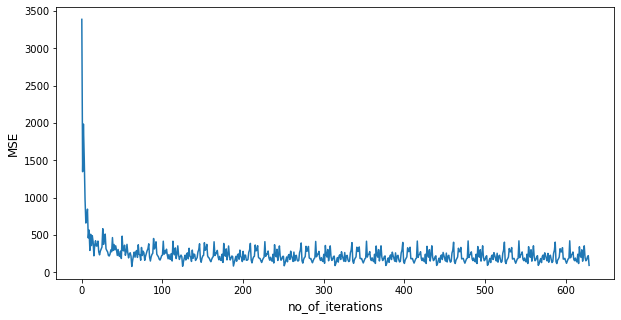

In [32]:
# plotting error vs iteration for mini batch gradient descent
print("Final Parameters:")
print("w:",w_mini.flatten())
print("b:",b_mini.flatten())
print("MSE:",mse)
plt.figure(figsize=(10,5))
sns.lineplot(x=np.arange(len(cost_iter_mini)),y=cost_iter_mini)
plt.xlabel("no_of_iterations",fontsize=12)
plt.ylabel("MSE",fontsize=12)

Text(0, 0.5, 'MSE')

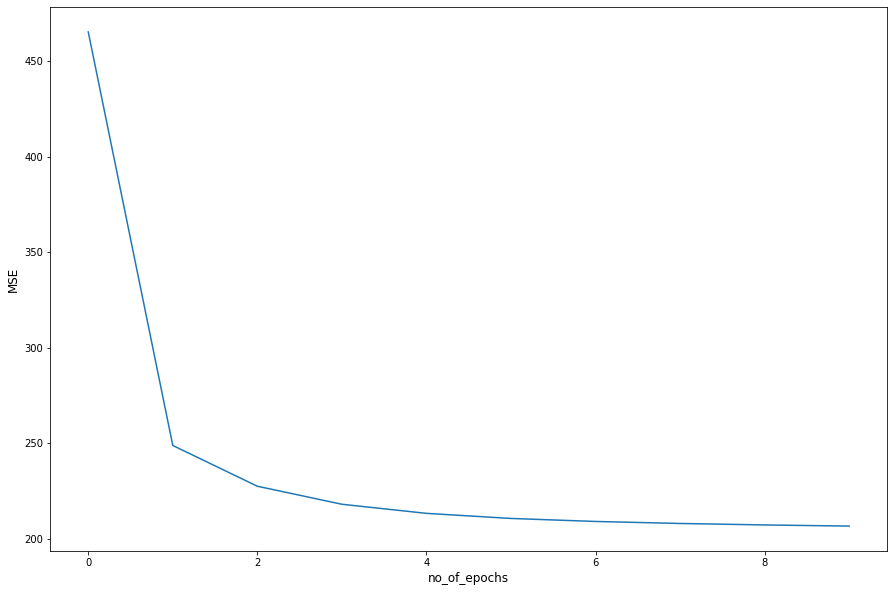

In [33]:
# plotting error vs epoch for mini batch gradient descent
plt.figure(figsize=(15,10))
sns.lineplot(x=np.arange(len(cost_iter_epoch)),y=np.array(cost_iter_epoch)/no_of_batches)
plt.xlabel("no_of_epochs",fontsize=12)
plt.ylabel("MSE",fontsize=12)